In [2]:
!pip install hpelm

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.4 MB 9.2 MB/s eta 0:00:01
   ------------- -------------------------- 2.1/6.4 MB 5.2 MB/s eta 0:00:01
   --------------------- ------------------ 3.4/6.4 MB 5.2 MB/s eta 0:00:01
   --------------------------- ------------ 4.5/6.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------- ----- 5.5/6.4 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 6.4/6.4 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 7.3 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.6 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-no


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import hpelm

In [12]:
data = pd.read_csv('small1.csv')
data.head()

,Unnamed: 0,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,0,BUKKAPATINAM,M,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,216.0,Jul,2015
1,1,BUKKAPATINAM,W,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,150.0,Jul,2015
2,2,BUKKAPATINAM,M,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
3,3,BUKKAPATINAM,W,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
4,4,BUKKAPATINAM,M,SKILLED \nLABOUR,CARPENTER,ANDHRA PRADESH,ANANTAPUR,300.0,Jul,2015


In [13]:
data = data.dropna()

In [14]:
X = data.drop('Wage(INR)', axis=1)
y = data['Wage(INR)'].values.reshape(-1, 1)

In [15]:
X = pd.get_dummies(X)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
elm = hpelm.ELM(X_train.shape[1], 1)
elm.add_neurons(1500, 'sigm')

In [19]:
elm.train(X_train, y_train, 'r')

In [20]:
from sklearn.metrics import mean_squared_error
y_pred = elm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3772.9786622722713


In [21]:
mae = mean_absolute_error(y_test, y_pred)
mae

38.78623166431394

In [22]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 61.424577021516974


In [23]:
r2 = r2_score(y_test, y_pred)
r2

0.7392302137825599

In [24]:
elm = hpelm.ELM(X_train.shape[1], 1)
elm.add_neurons(1500, 'tanh')

In [25]:
elm.train(X_train, y_train, 'r')

In [26]:
from sklearn.metrics import mean_squared_error
y_pred = elm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4010.9921590070553


In [27]:
mae = mean_absolute_error(y_test, y_pred)
mae

40.28461962170324

In [28]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 63.332394230812525


In [29]:
r2 = r2_score(y_test, y_pred)
r2

0.7227798878687062

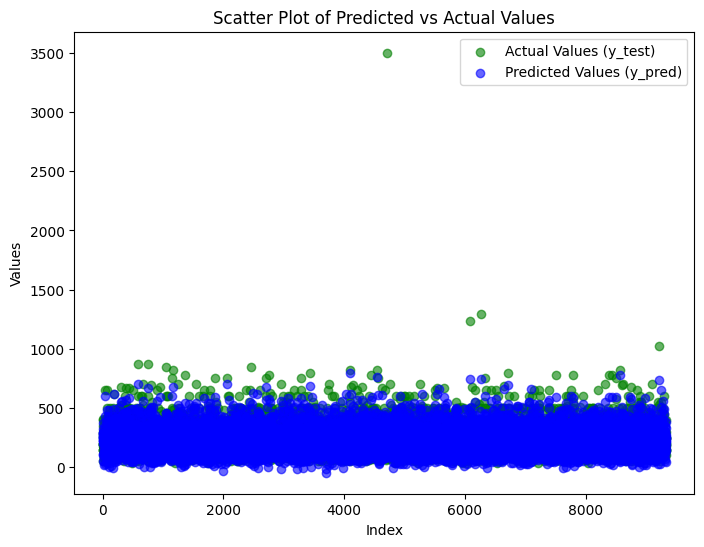

In [30]:
import matplotlib.pyplot as plt

# Assuming y_pred is your list of predicted values and y_test is your list of actual values

# Create a figure with specific size
plt.figure(figsize=(8, 6))

# Plot y_test as a line (if ordered) or scatter plot with a different color
plt.scatter(range(len(y_test)), y_test, color='green', alpha=0.6, label='Actual Values (y_test)')

# Plot y_pred as a scatter plot with a different color
plt.scatter(range(len(y_pred)), y_pred, color='blue', alpha=0.6, label='Predicted Values (y_pred)')

# Add labels and title
plt.xlabel('Index')  # Replace 'Index' with a more suitable x-axis label if needed
plt.ylabel('Values')
plt.title('Scatter Plot of Predicted vs Actual Values')

# Add a legend to distinguish the two plots
plt.legend()

# Show the plot
plt.show()

# the actual and predicted values are overlapping. it measn that the model is performing as expected.
# the points which are away from the majority points are the outliers.